In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy import interpolate

In [3]:
# Agrega el directorio superior al path
sys.path.append(os.path.abspath('..'))

In [4]:
import stars.EDOs.Sistemas as eds
import stars.Utilez as eu

In [5]:
eu.plots.general()

#### Veamos un ejemplo de resolución del sistema EDO para una EB

In [7]:
#?eds.systemBS

In [8]:
# [g, g', N, N', Phi, Phi'] -> [g0, g1, n0, n1, p0, p1]
rmin, rmax = 0, 19
w = 1.9173532
arg = [w, 2*np.pi]
p0 = 0.1
in0 = [1, 1, p0, 0]  # [g0, n0, Phi0, Phi'0]
npt = 3800
data = [in0, rmin, rmax, npt]

xval, yval = eu.rk.RKMet(eds.systemBS, data, arg=arg, rk='rk5')

# USANDO ALTERNATIVA DE scipy
rspan = np.linspace(rmin, rmax, npt)
arg = [w, 2*np.pi]
met = 'RK45'
Rtol = 1e-09
Atol = 1e-10
sol2 = solve_ivp(eds.systemBS, [rmin, rmax], in0, t_eval=rspan, args=(arg,), method=met, rtol=Rtol, atol=Atol)

In [6]:
#plt.plot(sol2.t, sol2.y[2])

Grafiquemos:
- el perfil del campo (panel izquierdo), 
- el perfil de la masa (demostrar como calcularlo y las unidades $M\, [M_{\mathrm{PL}}^2 m^{-1}]$),
- los perfiles métricos y su escalamiento.

La constante de escalamiento es:  0.6067032673636551 



/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_42769/1077418170.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5))
/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_42769/1077418170.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax0 = fig.add_axes((left_0, bottom_0, width_0, height_0))


Text(0.5, 0, '$r \\,[m^{-1}]$')

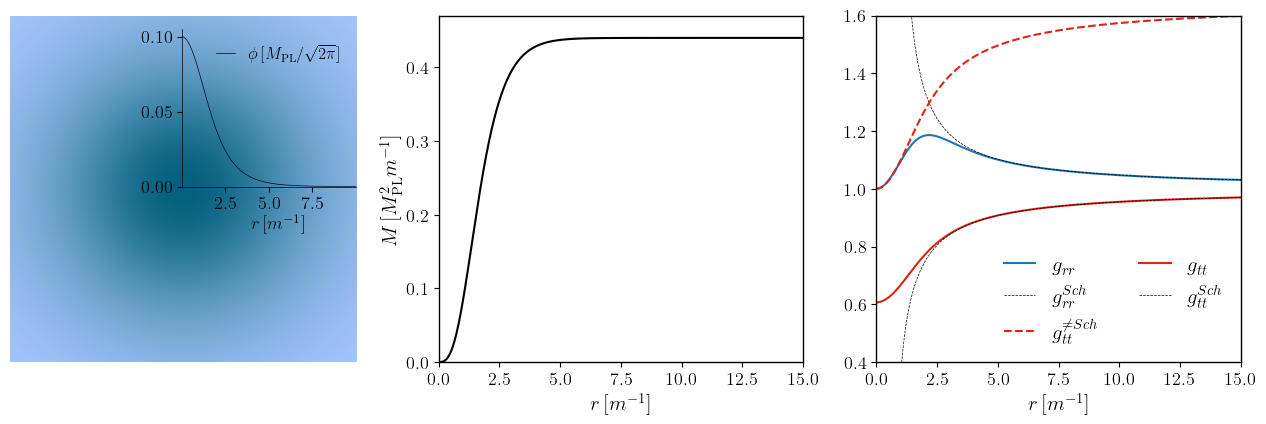

In [9]:
fR = interpolate.interp1d(xval, yval[:, 2])  # interpolamos el perfil

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5))

# dibujando circulo difuminado
rad = 2.5
xy0 = [0, 0]
eu.plots.circlef(ax[0], xy0, fR, rad, halo_color='#04617d', colf='#a3c4f7', npt=600, orig=False)

# Editando spines y limites
ax[0].set_xlim(-rad, rad)
ax[0].set_ylim(-rad, rad)

ax[0].spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax[0].set_xticks([])
ax[0].set_yticks([])

# insert plot
left_0, bottom_0, width_0, height_0 = 0.238, 0.5, 0.109, 0.35
ax0 = fig.add_axes((left_0, bottom_0, width_0, height_0))
ax0.patch.set_alpha(0)  # poniendolo transparente

ax0.plot(xval, yval[:, 2], lw=.5, color='#00060f', label=r'$\phi \, [M_{\mathrm{PL}}/\sqrt{2\pi}]$')

# Editando spines y limites
ax0.patch.set_facecolor('none')
ax0.spines[['top', 'right']].set_visible(False)
ax0.spines[['left', 'bottom']].set_position(('data', 0))
#ax0.spines['bottom'].set_bounds(low=0, high=12)

ax0.set_xlim(0, 10)
ax0.set_ylim(0, p0+0.005)
ax0.set_xticks([2.5, 5, 7.5])
ax0.set_yticks([0, p0/2, p0])

# añadiendo label
ax0.text(x=4., y=-0.028, s=r'$r \,[m^{-1}]$', zorder=105, fontsize='small')

# change all spines
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(0.5)


ax0.legend(loc='upper right', 
           frameon=False,
           fontsize=12,
           handlelength=1.1,
           labelspacing=0.2)


##########
mas = lambda r, g: r*(1-1/g**2)/2  # probar ecuación e unidades
ax[1].plot(xval, mas(xval, yval[:, 0]), c='k', lw=1.5, label=r'$M(r)$')

ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 0.47)

ax[1].set_ylabel(r'$M\, [M_{\mathrm{PL}}^2 m^{-1}]$')
ax[1].set_xlabel(r'$r \,[m^{-1}]$')

##########
Nmax = yval[-1, 1]
gmax = yval[-1, 0]
c = eu.tools.escalamiento(Nmax, gmax)  # constante de escalamiento

print('La constante de escalamiento es: ', c,  '\n')

# Identificando el radio de Sch
masa = mas(xval, yval[:, 0])[-1]  # masa (hablar de m99)
rSch = 2*masa  # radio de Sch
_, idx = eu.tools.find_nearest(xval, rSch)
xvalSch = xval[idx:]

# Sch g00 (recordar q N^2)
g00Sc = lambda r, masa: np.sqrt(1-2*masa/r)

## g_{rr} = gg
ax[2].plot(xval, yval[:, 0], lw=1.5, label=r'$g_{rr}$')
ax[2].plot(xvalSch, 1/g00Sc(xvalSch, masa), c='k', ls='--', lw=0.5, label=r'$g^{Sch}_{rr}$')

## g_{tt} = NN
ax[2].plot(xval, yval[:, 1], lw=1.5, c='#e02214', ls='--',label=r'$g^{\neq Sch}_{tt}$')
ax[2].plot(xval, yval[:, 1]*c, lw=1.5, c='#e02214', label=r'$g_{tt}$')
ax[2].plot(xvalSch, g00Sc(xvalSch, masa), c='k', ls='--', lw=0.5, label=r'$g^{Sch}_{tt}$')

ax[2].set_ylim(0.4, 1.6)
ax[2].set_xlim(0, 15)
ax[2].legend(frameon=False, ncol=2)
ax[2].set_xlabel(r'$r \,[m^{-1}]$')

#### test

Probemos que si escalamos y resolvemos la EDO obtenemos directamente que la configuración se pega a la solución de Sch. y las cantidades como el perfil, M, etc. no cambian.

In [10]:
rspan = np.linspace(rmin, rmax, npt)
arg = [w*c, 2*np.pi]
p0 = 0.1
in0 = [1, 1*c, p0, 0]  # [g0, n0, Phi0, Phi'0]
met = 'RK45'
Rtol = 1e-09
Atol = 1e-10
sol2 = solve_ivp(eds.systemBS, [rmin, rmax], in0, t_eval=rspan, args=(arg,), method=met, rtol=Rtol, atol=Atol)  # usamos la librería de Python

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_42769/3902489401.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),


Text(0.5, 0, '$r \\,[m^{-1}]$')

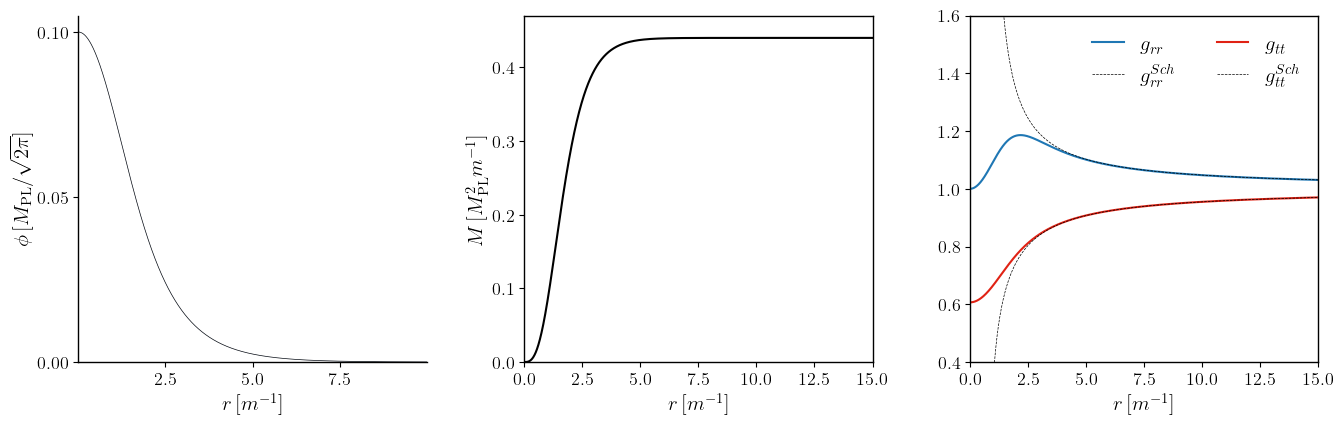

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(sol2.t, sol2.y[2], lw=.5, color='#00060f', label=r'$\phi \, [M_{\mathrm{PL}}/\sqrt{2\pi}]$')

# Editando spines y limites
ax[0].patch.set_facecolor('none')
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].spines[['left', 'bottom']].set_position(('data', 0))
#ax0.spines['bottom'].set_bounds(low=0, high=12)

ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, p0+0.005)
ax[0].set_xticks([2.5, 5, 7.5])
ax[0].set_yticks([0, p0/2, p0])
ax[0].set_xlabel(r'$r \,[m^{-1}]$')
ax[0].set_ylabel(r'$\phi \, [M_{\mathrm{PL}}/\sqrt{2\pi}]$')

###
mas = lambda r, g: r*(1-1/g**2)/2  # probar ecuación e unidades
ax[1].plot(sol2.t, mas(sol2.t, sol2.y[0]), c='k', lw=1.5, label=r'$M(r)$')

ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 0.47)

ax[1].set_ylabel(r'$M\, [M_{\mathrm{PL}}^2 m^{-1}]$')
ax[1].set_xlabel(r'$r \,[m^{-1}]$')

##########
# Identificando el radio de Sch
masa = mas(sol2.t, sol2.y[0])[-1]  # masa (hablar de m99)
rSch = 2*masa  # radio de Sch
_, idx = eu.tools.find_nearest(xval, rSch)
xvalSch = xval[idx:]

# Sch g00 (recordar q N^2)
g00Sc = lambda r, masa: np.sqrt(1-2*masa/r)

## g_{rr} = gg
ax[2].plot(sol2.t, sol2.y[0], lw=1.5, label=r'$g_{rr}$')
ax[2].plot(xvalSch, 1/g00Sc(xvalSch, masa), c='k', ls='--', lw=0.5, label=r'$g^{Sch}_{rr}$')

## g_{tt} = NN
ax[2].plot(sol2.t, sol2.y[1], lw=1.5, c='#e02214', label=r'$g_{tt}$')
ax[2].plot(xvalSch, g00Sc(xvalSch, masa), c='k', ls='--', lw=0.5, label=r'$g^{Sch}_{tt}$')

ax[2].set_ylim(0.4, 1.6)
ax[2].set_xlim(0, 15)
ax[2].legend(frameon=False, ncol=2)
ax[2].set_xlabel(r'$r \,[m^{-1}]$')

### Sistematizado 


Hasta ahora no hemos hablado del cómo encontrar la $w$ o en su efecto el $p0$ que satisfaga el comportamiento anterior (recuperar Sch.). A continuación seguiremos el enfoque de fijar el valor de $p0$ y encontrar la $w$ que nos permite satisfacer las condiciones de frontera. AHORA, es importante notar que se puede hacer lo contrario, fijar $w$ y encontrar $p0$, para este caso la metodología que veremos también aplica con leves variaciones en los condicionales.

`COMPORTAMIENTO` del campo: Consideremos la solución previa y veamos que ocurre si tomamos valores para $w$ mayores y menores

In [12]:
rmin, rmax = 0, 19
rspan = np.linspace(rmin, rmax, npt)

wval = [1.73, 1.9173532, 1.97]  # valores para w
p0 = 0.1
in0 = [1, 1, p0, 0]  # [g0, n0, Phi0, Phi'0]
npt = 3800
data = [in0, rmin, rmax, npt]

p0ProfSinPasoAdap, p0Prof = [], []
for w in wval:
    arg = [w, 2*np.pi]
    
    xval, yval = eu.rk.RKMet(eds.systemBS, data, arg=arg, rk='rk5')
    sol2 = solve_ivp(eds.systemBS, [rmin, rmax], in0, t_eval=rspan, args=(arg,), method='RK45', rtol=1e-09, atol= 1e-10)
    
    p0ProfSinPasoAdap.append([xval, yval[:, 2]])
    p0Prof.append([sol2.t, sol2.y[2]])

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_42769/1286980267.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),


Text(0, 0.5, '$\\phi \\, [M_{\\mathrm{PL}}/\\sqrt{2\\pi}]$')

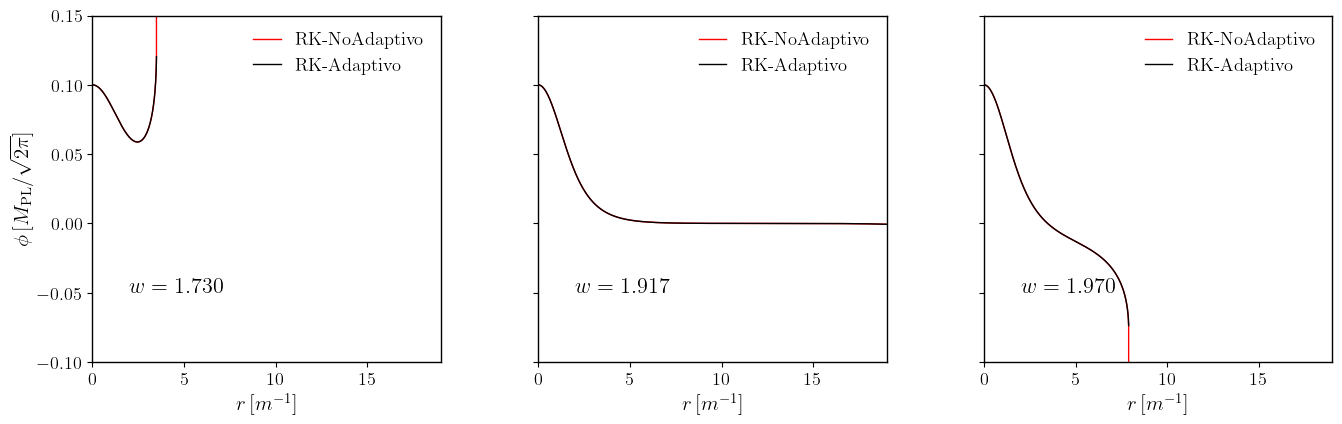

In [13]:
# graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

for i in range(3):
    ax[i].plot(p0ProfSinPasoAdap[i][0], p0ProfSinPasoAdap[i][1], c='red', lw=1, label=r'RK-NoAdaptivo')
    ax[i].plot(p0Prof[i][0], p0Prof[i][1], c='k', lw=1, label=r'RK-Adaptivo')
    
    # comentar
    ax[i].set_xlim(0, rmax)
    ax[i].set_ylim(-p0, p0+0.005)
    ax[i].set_yticks([-p0, -p0/2, 0, p0/2, p0, p0+0.05])

    ax[i].text(x=2., y=-0.05, s=r'$w = %4.3f$'%wval[i])
    ax[i].legend(frameon=False, fontsize='small')
    ax[i].set_xlabel(r'$r \,[m^{-1}]$')

ax[0].set_ylabel(r'$\phi \, [M_{\mathrm{PL}}/\sqrt{2\pi}]$')


`COMENTARIOS`

- El panel central corresponde a la frecuencia *correcta* (en realidad también diverge a cierto radio), como se puede apreciar, si el valor de la frecuencia $w$ es menor el perfil del campo crece (panel izquierdo), sin embargo, si el valor de la frecuencia es mayor, el campo decrece (panel derecho). Este comportamiento no es único de este perfil, se cumple de manera general y de hecho, es lo que utilizaremos para la implementación de un algoritmo de *shooting* que nos permita automatizar la obtención de las respectivas frecuecnias dado una amplitud central para el campo $p0$.

- Notemos que graficamos un RK con paso adaptativo y otro que no lo hace. Si comentamos los límites de integración veremos que el caso adaptativo no diverge como ocurre en el no adaptativo (tiene subalgoritmos que detienen la iteración cuando encuentra una divergencia). Por tal motivo utilizaremos el primero para nuestra implementación del shooting. IMPORTANTE: el RK no adaptativo funciona bien se puede usar en el shooting, sin embargo para evitar ciertos comportamientos no deseados preferimos usar el adaptativo (siéntanse libres de extender el código RK para prevenir divegencias!)

Para la implementación usaremos la opción `events` de la función `solve_ivp` (ver ayuda de [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)). Esta nos permite detectar cuando se cumple cierta condición durante la iteración numérica. En nuestro caso:
- cuando el perfil se vuelve negativo (decrece)
- cuando la primera derivada del perfil pasa a ser positiva (crece el perfil)

Estos son los dos criterios que como discutimos implicará que debamos DISMINUIR o AUMENTAR el valor de $w$ respectivamente.

IMPORTANTE: Pueden no usar `solve_ivp` y programar una función que detecte los cambios de signos del perfil y su derivada. Luego, la utilizan con el código de RK no adaptativo y hace la misma función. (¡Al final del curso, si nos da tiempo lo hacemos!)

In [14]:
def Freq_solve(system, in0, wmin, wmax, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, alphB=1, info=False):
    """
    Implementación de un algoritmo de shooting usando un método de bisección para encontrar el valor de la 
    frecuencia w0, dado una amplitud central p0.

    In:
    system -> sitema de ecuaciones: eds.systemBS
    in0 -> condiciones iniciales del problema: [g0, n0, p0, p1] recordar que [g, g', N, N', Phi, Phi'] -> [g0, g1, n0, n1, p0, p1]
    wmin, wmax -> rango de valores en el que se buscará la frecuencia (recomendado añadir un check al código que verifique que wmin<wmax)
    rmax, rmin -> intervalo que se discretizará, por defecto rmin=0, rmax=1e03 (notar que lo q se busca es que alcance el límite en w0)
    met -> metodología usada por solve_ivp, las opciones son: 'DOP853', 'LSODA', 'RK45', por defecto está este último
    Rtol, Atol=1e-10 -> representan la tolerancia relativa y absoluta al usar solve_ivp, por defecto son Rtol=1e-09, Atol=1e-10
    limw -> representa la diferencia limítrofe que aceptaremos: abs((wmax-wmin)/2)<=limw Por defecto es limw=1e-14 
    alphB -> Valor de alphaB, por defecto alphB=1
    info -> Imprime información complementaria, por defecto info=False

    Out:
    w0, rTemp  -> valor de la frecuencia encontrada y el radio máximo de la iteración
    """


    # IMPORTANT: it is not possible to find two event at same time
    # Events
    def Sig(r, yV, arg): return yV[2]
    def dSig(r, yV, arg): return yV[3]

    # establece las direcciones
    Sig.direction = -1  
    dSig.direction = 1
    # If direction is positive, event will only trigger when going from negative to positive, 
    # and vice versa if direction is negative. If 0, then either direction will trigger event. Implicitly 0 if not assigned.
    
    # establece que acción tomar
    Sig.terminal = True
    dSig.terminal = True

    while True:
        w0 = (wmax+wmin)/2  # bisección metodología
        arg = [w0, alphB]

        sol = solve_ivp(system, [rmin, rmax], in0, events=(Sig, dSig),  # notar orden de los eventos
                         args=(arg,), method=met,  rtol=Rtol, atol=Atol)
        
        if sol.t[-1]==rmax:  # caso en que alcanzó el rmax
            print('Found', w0)
            rTemp = sol.t[-1]
            break  
        elif sol.t_events[0].size > 0:  # caso en que hay algún evento tipo Sig, es decir p0 negativa
            wmax = w0
            if info:
                print('Aumentando', 'w0 = ', w0, 'wmax = ', wmax, 'wmin ', wmin)
        elif sol.t_events[1].size > 0:  # caso en que hay algún evento tipo dSig, es decir p' positiva
            wmin = w0
            if info:
                print('Disminuyendo', 'w0 = ', w0, 'wmax = ', wmax, 'wmin ', wmin)

        # checking the lim freq.
        if abs((wmax-wmin)/2)<=limw:
            print('Maxima precisión alcanzada', w0, 'radio', sol.t[-1])
            rTemp = sol.t[-1]
            break

    return w0, rTemp

In [15]:
wmin, wmax = 0.5, 3
p0 = 0.1
in0 = [1, 1, p0, 0]

Freq_solve(eds.systemBS, in0, wmin, wmax, alphB=2*np.pi)
# usado w = 1.9173532, r = 19

Maxima precisión alcanzada 1.9173530331668083 radio 22.733157048991842


(1.9173530331668083, 22.733157048991842)

Reto:
- Intentar implementar una metodología donde ahora este fijo $w$ y encuentre $p0$. Tip: lo que cambia es que ahora si aumentas (disminuye) $p0$ el perfil crece (decrece). Es decir, contrario al caso visto.

`Estados de mayor energía:`

A diferencia de las estrellas de neutrones, donde como vimos los neutrones se encuentran en el límite degenerado y por el principio de exclusión de Pauli poblan todos los estados. Las estrellas de bosones pueden tener todos los bosones en el mismo estado. Las configuraciones construidas anteriormente son configuraciones sin nodos $n=0$ (donde $n$ es el número de nodos) y representan la configuración de menor energía.

Preguntas: 
- la configuración de menor energía qué representa?
- cómo podríamos calcular la energía de la configuración?

Sin embargo, como sabemos de nuestros cursos de física, podemos tener otros niveles de energía, no solo el base. Los subsecuentes estados *excitados* (n>0) también representan configuraciones o soluciones del modelo Einstein-Klein-Gordon, por ende hemos de computarla. IMPORTANTE: No es nuestro objetivo el estudio de la estabilidad de estas últimas, solo queremos *construirlas*.

Reto:

- Generalizar la metodología anterior (o crear una propia) capaz de dado los valores $p0, m$ encontrar la $w0$ que satisface las condiciones de frontera. Tips: Notar cuántas veces ha de cambiar la primera derivada del campo por número de nodos, y cuantas veces ha de cambiar el signo del campo por nodos.



In [16]:
# MI implementación
def Freq_solveNodos(system, in0, wmin, wmax, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, alphB=1, nodos=0, info=False):
    """
    Implementación de un algoritmo de shooting usando un método de bisección para encontrar el valor de la 
    frecuencia w0, dado una amplitud central p0.

    In:
    system -> sitema de ecuaciones: eds.systemBS
    in0 -> condiciones iniciales del problema: [g0, n0, p0, p1] recordar que [g, g', N, N', Phi, Phi'] -> [g0, g1, n0, n1, p0, p1]
    wmin, wmax -> rango de valores en el que se buscará la frecuencia (recomendado añadir un check al código que verifique que wmin<wmax)
    rmax, rmin -> intervalo que se discretizará, por defecto rmin=0, rmax=1e03 (notar que lo q se busca es que alcance el límite en w0)
    met -> metodología usada por solve_ivp, las opciones son: 'DOP853', 'LSODA', 'RK45', por defecto está este último
    Rtol, Atol=1e-10 -> representan la tolerancia relativa y absoluta al usar solve_ivp, por defecto son Rtol=1e-09, Atol=1e-10
    limw -> representa la diferencia limítrofe que aceptaremos: abs((wmax-wmin)/2)<=limw Por defecto es limw=1e-14 
    alphB -> Valor de alphaB, por defecto alphB=1
    nodos -> los nodos de la configuracion
    info -> Imprime información complementaria, por defecto info=False

    Out:
    w0, rTemp, nodosPosit  -> valor de la frecuencia encontrada, el radio máximo de la iteración y la posición de los nodos
    """
    
    print('Finding a profile with ', nodos, 'nodes')
    
    def Sig(r, yV, arg): return yV[2]
    def dSig(r, yV, arg): return yV[3]

    # establece las direcciones
    Sig.direction = 0  # como pueden ser varios nodos se pone 0. Notar que no hay acción que tomar, solo almacenamos 
    dSig.direction = 0

    while True:
        w0 = (wmax+wmin)/2
        arg = [w0, alphB]

        sol = solve_ivp(system, [rmin, rmax], in0, events=(Sig, dSig),
                         args=(arg,), method=met,  rtol=Rtol, atol=Atol)
        
        if sol.t_events[1].size == nodos+1 and sol.t_events[0].size == nodos:
            print('Found', w0)
            rTemp = sol.t[-1]
            nodosPosit = sol.t_events[0]
            break
        elif sol.t_events[1].size > nodos+1:  # una vez por nodo
            if sol.t_events[0].size > nodos:  # dos veces por nodo
                wmax = w0
                rTemp = sol.t_events[0][-1]
            else:  # si pasa por cero más veces que 2*nodos se aumenta la w, sino se disminuye
                wmin = w0
                rTemp = sol.t_events[1][-1]
        elif sol.t_events[1].size <= nodos+1:
            if sol.t_events[0].size > nodos:  # dos veces por nodo
                wmax = w0
                rTemp = sol.t_events[0][-1]
            else:
                wmin = w0
                rTemp = sol.t_events[1][-1]

        # checking the lim freq.
        if abs((wmax-wmin)/2)<=limw:
            print('Maxima precisión alcanzada', w0, 'radio', rTemp)
            nodosPosit = sol.t_events[0]
            break
        
        if nodos==0:
            nodosPosit = None

    return w0, rTemp, nodosPosit 

In [17]:
wmin, wmax = 0.5, 3
p0 = 0.1
in0 = [1, 1, p0, 0]
nodosData = [0, 1, 2, 3]

dataProf = []
for i in nodosData:
    w, rMax, nPso = Freq_solveNodos(eds.systemBS, in0, wmin, wmax, alphB=2*np.pi, nodos=i)
    dataProf.append([w, rMax, nPso])

Finding a profile with  0 nodes
Maxima precisión alcanzada 1.9173530331668083 radio 22.733157048991842
Finding a profile with  1 nodes
Maxima precisión alcanzada 2.139663650197516 radio 30.50587682212713
Finding a profile with  2 nodes
Maxima precisión alcanzada 2.242969635673166 radio 37.04066937169465
Finding a profile with  3 nodes
Maxima precisión alcanzada 2.3082428384987104 radio 44.081870079985386


/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_20679/1511070406.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5),


(0.0, 2.0)

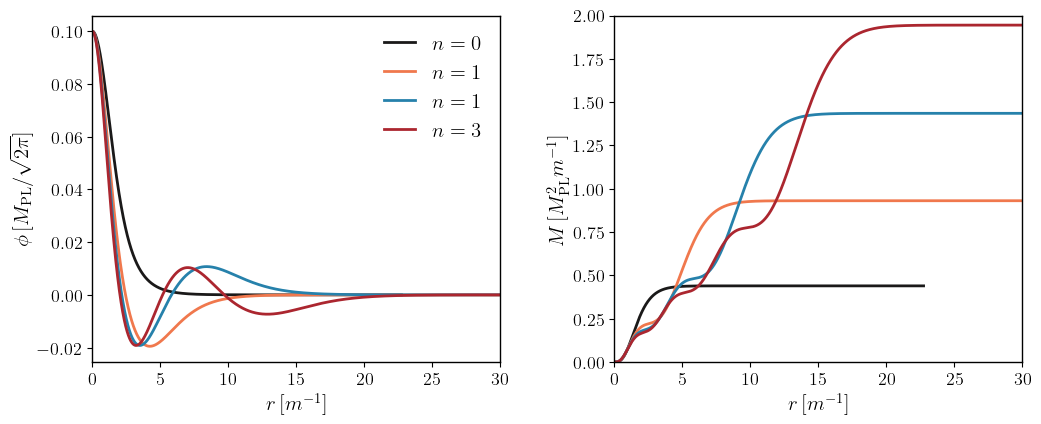

In [24]:
p0 = 0.1
in0 = [1, 1, p0, 0]
nodosData = [0, 1, 2, 3]
npt = 3800

mas = lambda r, g: r*(1-1/g**2)/2
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']
 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

k = 0
for w, rMax, nPso in dataProf:
    data = [in0, rmin, rMax, npt]
    arg = [w, 2*np.pi]
    xval, yval = eu.rk.RKMet(eds.systemBS, data, arg=arg, rk='rk5')
    ax[0].plot(xval, yval[:, 2], c=col[k], label=r'$n=%d$'%(len(nPso)-1))

    ax[1].plot(xval, mas(xval, yval[:, 0]), c=col[k])
    k += 1

ax[0].set_xlim(0, 30)
ax[0].legend(frameon=False)
ax[0].set_xlabel(r'$r \,[m^{-1}]$')
ax[0].set_ylabel(r'$\phi \, [M_{\mathrm{PL}}/\sqrt{2\pi}]$')

ax[1].set_ylabel(r'$M\, [M_{\mathrm{PL}}^2 m^{-1}]$')
ax[1].set_xlabel(r'$r \,[m^{-1}]$')
ax[1].set_xlim(0, 30)
ax[1].set_ylim(0, 2)

Como sabemos la energía está relacionada con la masa, y pues como se ve, la configuración de menor masa es $n=0$. Ahora, intentemos computar formalmente la energía de una estrella de bosones:

## Límite no relativista